In [1]:
!pip install matplotlib-inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Import libraries
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from IPython.display import set_matplotlib_formats
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('retina', quality=100)

In [4]:
# Load the data
df = pd.read_csv('nyc_health_borough.csv')

In [5]:
df

,Unnamed: 0,Venue,Category,Latitude_x,Longitude_x,Neighborhood,ZIP,Borough,Longitude_y,Latitude_y
0,0,Wakefield Eye Care,Optometrist,40.898682,-73.849352,Wakefield,10466,Bronx,-73.847201,40.894705
1,1,Advanced Dental Group,Dentist,40.875278,-73.828492,Co-op City,10475,Bronx,-73.829939,40.874294
2,2,Creating Smiles,Dentist,40.871558,-73.830285,Co-op City,10475,Bronx,-73.829939,40.874294
3,3,NYC Health & Hospitals,Medical Center,40.873701,-73.826771,Co-op City,10475,Bronx,-73.829939,40.874294
4,4,Montefiore Medical Group,Physician,40.877116,-73.828470,Co-op City,10475,Bronx,-73.829939,40.874294
...,...,...,...,...,...,...,...,...,...,...
5859,5859,Staten Island Dental Arts Center,Dentist,40.529627,-74.202826,Prince's Bay,10309,Staten Island,-74.201526,40.526264
5860,5860,Arverne Dental,Dentist,40.587008,-73.811274,Hammels,11693,Queens,-73.805530,40.587338
5861,5861,Beach Ny Physical Ther,Physical Therapy Clinic,40.587227,-73.811108,Hammels,11693,Queens,-73.805530,40.587338
5862,5862,Heritage Adult Care,Healthcare Clinic,40.587227,-73.811108,Hammels,11693,Queens,-73.805530,40.587338


In [6]:
# Count number of locations per category
cat_count = df['Category'].value_counts()

In [ ]:
cat_count

Dentist                               996
Health and Medicine                   617
Doctor's Office                       478
Physician                             327
Physical Therapy Clinic               309
Medical Center                        260
Optometrist                           239
Veterinarian                          219
Hospital                              203
Healthcare Clinic                     179
Chiropractor                          140
Ophthalmologist                       128
Podiatrist                            127
Acupuncture Clinic                    124
Mental Health Clinic                  106
Home Health Care Service              100
Pediatrician                           95
Mental Health Service                  82
Nutritionist                           78
Dermatologist                          76
Nurse                                  75
Assisted Living Service                75
General Surgeon                        67
Nursing Home                      

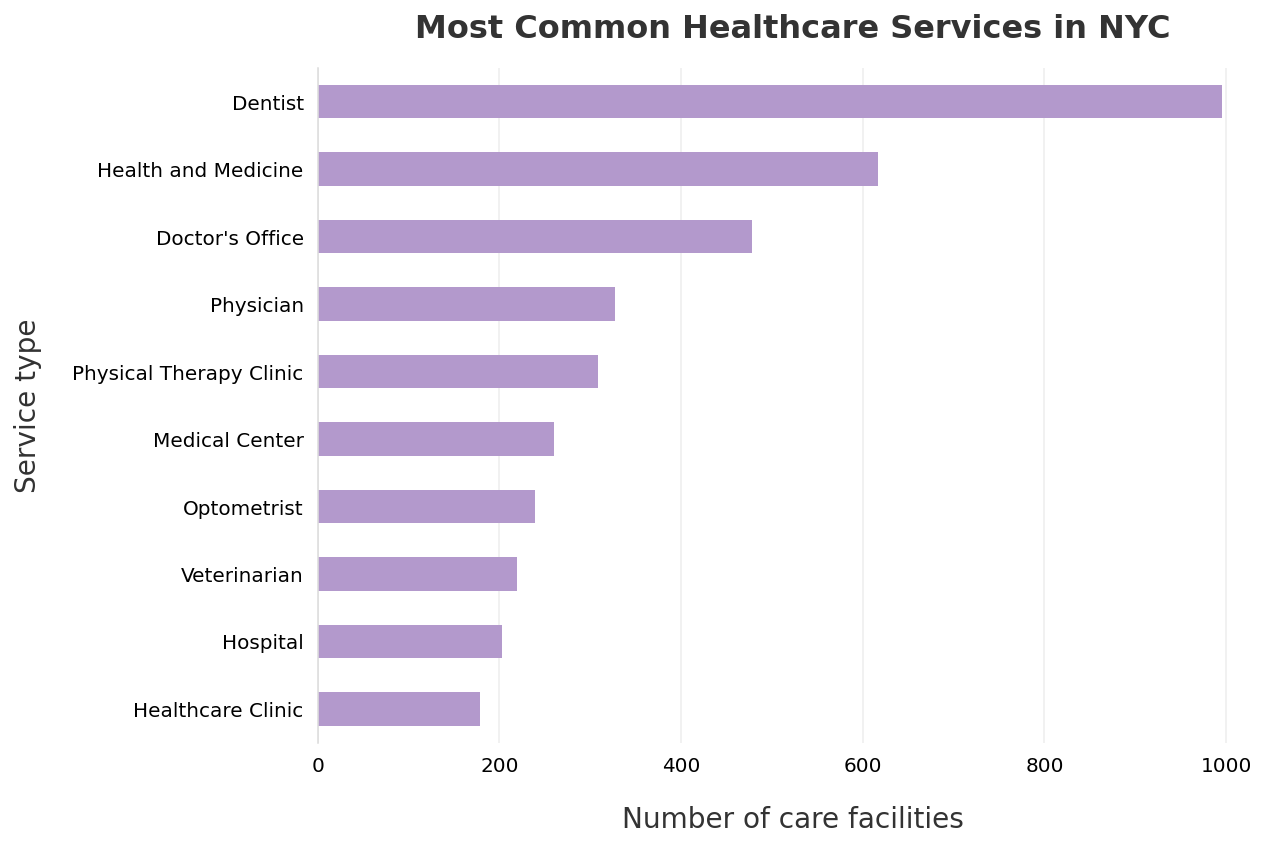

In [7]:
# Plot most common healthcare locations in NYC
# Initialize fig and axes objects 
f, ax = plt.subplots(figsize=(9,6))

# Plot total number of venues
ax = cat_count.head(10).plot(kind='barh', color=(0.7, 0.6, 0.8, 1))
ax.invert_yaxis()

# Remove top, right and left spines (borders)
# Also, make the bottom spine gray instead of black.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#DDDDDD')
ax.spines['bottom'].set_visible(False)

# Remove axis ticks
ax.tick_params(bottom=False, left=False)

# Keep the horizontal grid hidden.
# Color the vertical lines as light gray.
ax.set_axisbelow(True)
ax.yaxis.grid(False)
ax.xaxis.grid(True, color='#EEEEEE')

# Add labels and a title. 
ax.set_xlabel('Number of care facilities', labelpad=15, color='#333333', 
              fontsize=14)
ax.set_ylabel('Service type', labelpad=15, color='#333333', fontsize=14)
ax.set_title('Most Common Healthcare Services in NYC',loc='center', pad=15, 
             color='#333333', weight='bold', fontsize=16)

# Make the chart fill out the figure better.
f.tight_layout()
#f.savefig('most-common-ven-nyc.png', dpi=300)

In [9]:
# Count number of locations in each neighborhood
most_venues = df.groupby('Neighborhood').agg(
    n_venues=('Venue', 'count')).sort_values('n_venues', ascending=False)

In [10]:
most_venues = most_venues.squeeze()
most_venues

Neighborhood
Chinatown             174
East Village          131
Lenox Hill            124
Chelsea, Manhattan    119
Forest Hills          113
                     ... 
Grymes Hill             1
Queensbridge            1
Hollis                  1
Arlington               1
Cypress Hills           1
Name: n_venues, Length: 227, dtype: int64

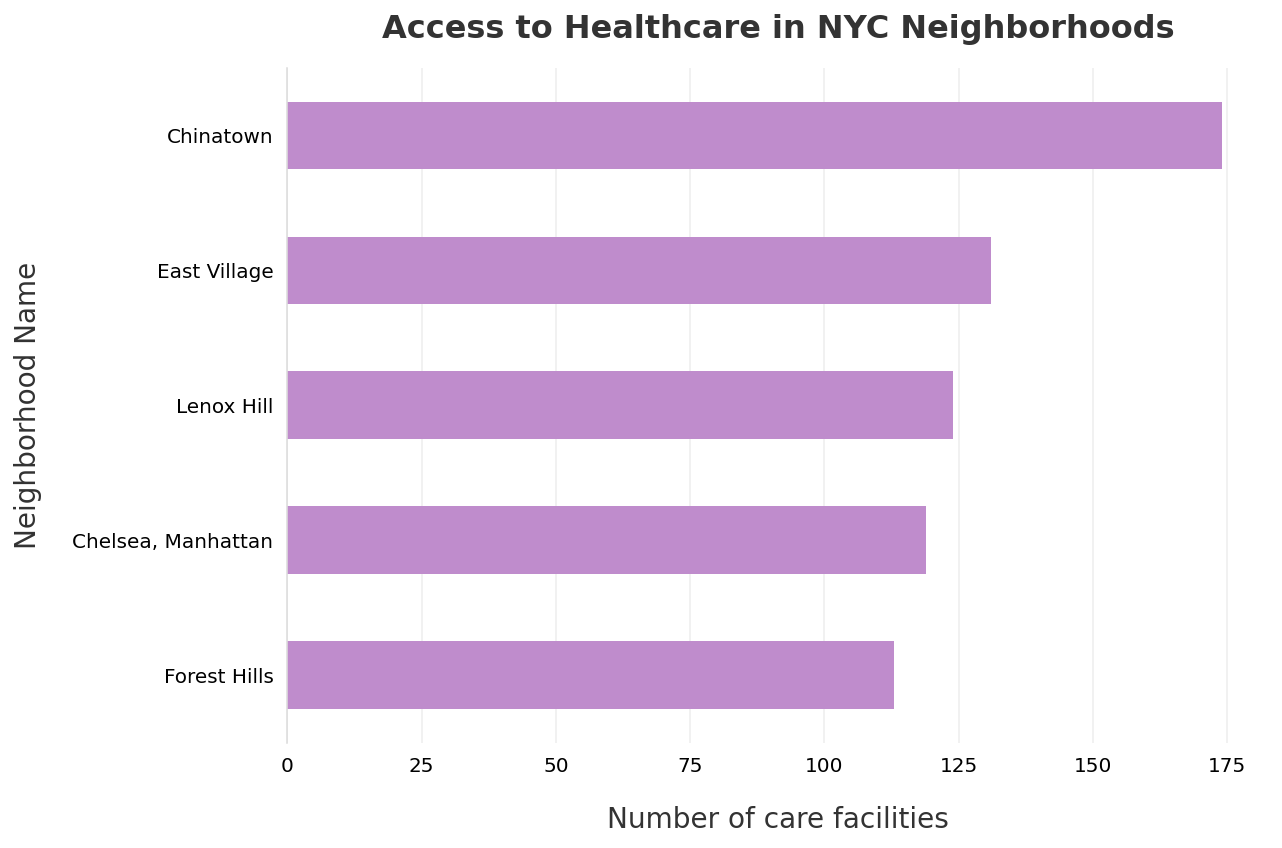

In [11]:
# Initialize fig and axes objects 
f2, ax2 = plt.subplots(figsize=(9,6))

# Plot total number of venues
ax2 = most_venues.head(5).plot(kind='barh', color=(0.75, 0.55, 0.8, 1))
ax2.invert_yaxis()

# Remove top, right and left spines (borders)
# Also, make the bottom spine gray instead of black.
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_color('#DDDDDD')
ax2.spines['bottom'].set_visible(False)

# Remove axis ticks
ax2.tick_params(bottom=False, left=False)

# Keep the horizontal grid hidden.
# Color the vertical lines as light gray.
ax2.set_axisbelow(True)
ax2.yaxis.grid(False)
ax2.xaxis.grid(True, color='#EEEEEE')

# Add labels and a title. 
ax2.set_xlabel('Number of care facilities', labelpad=15, color='#333333', 
               fontsize=14)
ax2.set_ylabel('Neighborhood Name', labelpad=15, color='#333333', fontsize=14)
ax2.set_title('Access to Healthcare in NYC Neighborhoods',loc='center', pad=15, 
              color='#333333', weight='bold', fontsize=16)

# Make the chart fill out the figure better.
f2.tight_layout()

In [12]:
# Load the population dataset and select most recent census
pop = pd.read_csv('New_York_City_Population_By_Neighborhood_Tabulation_Areas.csv')
pop_2010 = pop[pop['Year'] == 2010]
pop_2010.head(3)

,Borough,Year,FIPS County Code,NTA Code,NTA Name,Population
195,Bronx,2010,5,BX01,Claremont-Bathgate,31078
196,Bronx,2010,5,BX03,Eastchester-Edenwald-Baychester,34517
197,Bronx,2010,5,BX05,Bedford Park-Fordham North,54415


In [13]:
# Get population by borough
pop_bor = pop_2010.groupby('Borough', as_index=False).agg({'Population': 'sum'})
pop_bor

,Borough,Population
0,Bronx,1385108
1,Brooklyn,2504700
2,Manhattan,1585873
3,Queens,2230722
4,Staten Island,468730


In [14]:
# Group by borough and drop other columns 
ven_bor = df.groupby('Borough', as_index=False).agg({'Venue': 'count'})
ven_bor

,Borough,Venue
0,Bronx,828
1,Brooklyn,1602
2,Manhattan,1694
3,Queens,1380
4,Staten Island,360


In [15]:
# Merge dataframes on borough
ven_pop = pd.merge(ven_bor, pop_bor, on='Borough')
ven_pop

,Borough,Venue,Population
0,Bronx,828,1385108
1,Brooklyn,1602,2504700
2,Manhattan,1694,1585873
3,Queens,1380,2230722
4,Staten Island,360,468730


In [16]:
# Add new features:  venue per resident
ven_pop['Venue per resident*1000'] = ven_pop['Venue']/ven_pop['Population']*1000
ven_pop

,Borough,Venue,Population,Venue per resident*1000
0,Bronx,828,1385108,0.597787
1,Brooklyn,1602,2504700,0.639598
2,Manhattan,1694,1585873,1.068181
3,Queens,1380,2230722,0.618634
4,Staten Island,360,468730,0.768033


In [17]:
# Save boroughs as a list
y_ticks = list(ven_pop['Borough'])

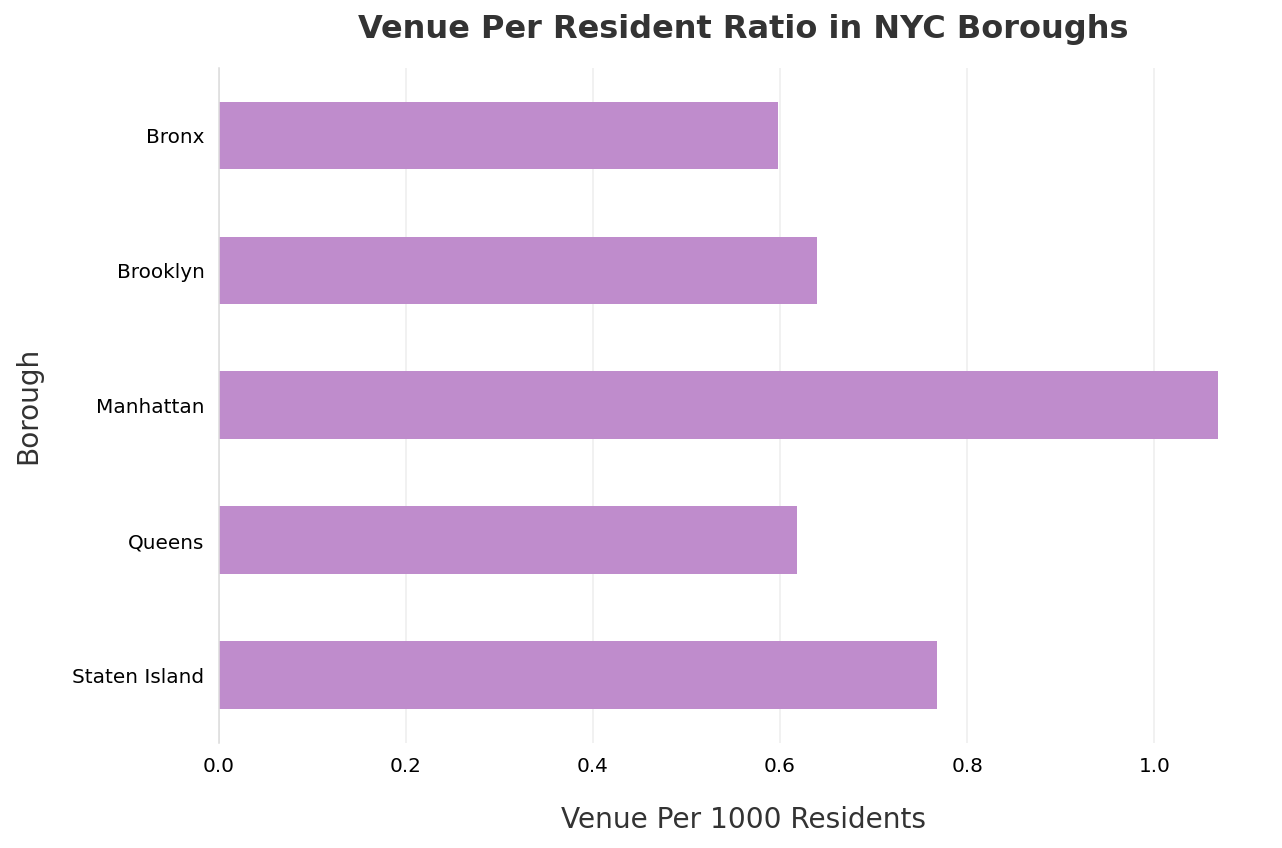

In [20]:
# Initialize fig and axes objects 
f2, ax2 = plt.subplots(figsize=(9,6))

# Plot total number of venues
ax2 = ven_pop['Venue per resident*1000'].plot(kind='barh', color=(0.75, 0.55, 0.8, 1))
ax2.invert_yaxis()

# Remove top, right and left spines (borders)
# Also, make the bottom spine gray instead of black.
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_color('#DDDDDD')
ax2.spines['bottom'].set_visible(False)

# Remove axis ticks
ax2.tick_params(bottom=False, left=False)

# Keep the horizontal grid hidden.
# Color the vertical lines as light gray.
ax2.set_axisbelow(True)
ax2.set_yticklabels(y_ticks, rotation='horizontal')
ax2.yaxis.grid(False)
ax2.xaxis.grid(True, color='#EEEEEE')

# Add labels and a title. 
ax2.set_xlabel('Venue Per 1000 Residents', labelpad=15, color='#333333', fontsize=14)
ax2.set_ylabel('Borough', labelpad=15, color='#333333', fontsize=14)
ax2.set_title('Venue Per Resident Ratio in NYC Boroughs',loc='center', pad=15, color='#333333',
             weight='bold', fontsize=16)

# Make the chart fill out the figure better.
f2.tight_layout()
#f2.savefig('borough-venues.png', dpi=300)